# Null Handling

In [2]:
df=pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline

In [5]:
df_nan.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [3]:
# Replacing all 0 values with Null values
def replace_zero(df):
 df_nan=df.copy(deep=True)
 cols = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
 df_nan[cols] = df_nan[cols].replace({0:np.nan})
 return df_nan
df_nan=replace_zero(df)

In [10]:
#Finding median
def find_median(frame,var):
    temp = frame[frame[var].notnull()]
    temp = frame[[var,'Outcome']].groupby('Outcome')[[var]].median().reset_index()
    return temp

In [13]:
print(find_median(df_nan,'Glucose'))
print(find_median(df_nan,'BloodPressure'))
print(find_median(df_nan,'SkinThickness'))
print(find_median(df_nan,'Insulin'))
print(find_median(df_nan,'BMI'))
print(find_median(df_nan,'DiabetesPedigreeFunction'))
print(find_median(df_nan,'Age'))

   Outcome  Glucose
0        0    107.0
1        1    140.0
   Outcome  BloodPressure
0        0           70.0
1        1           74.5
   Outcome  SkinThickness
0        0           27.0
1        1           32.0
   Outcome  Insulin
0        0    102.5
1        1    169.5
   Outcome   BMI
0        0  30.1
1        1  34.3
   Outcome  DiabetesPedigreeFunction
0        0                     0.336
1        1                     0.449
   Outcome   Age
0        0  27.0
1        1  36.0


In [14]:
# Replacing Null values
def replace_null(frame,var):
 median_df=find_median(frame,var)
 var_0=median_df[var].iloc[0]
 var_1=median_df[var].iloc[1]
 frame.loc[(frame['Outcome'] == 0) & (frame[var].isnull()), var] = var_0
 frame.loc[(frame['Outcome'] == 1) & (frame[var].isnull()), var] = var_1
 return frame[var].isnull().sum()


In [15]:
# Calling functions
print(str(replace_null(df_nan,'Glucose'))+ ' Nulls for Glucose')
print(str(replace_null(df_nan,'SkinThickness'))+ ' Nulls for SkinThickness')
print(str(replace_null(df_nan,'Insulin'))+ ' Nulls for Insulin')
print(str(replace_null(df_nan,'BMI'))+ ' Nulls for BMI')
print(str(replace_null(df_nan,'BloodPressure'))+ ' Nulls for BloodPressure')

0 Nulls for Glucose
0 Nulls for SkinThickness
0 Nulls for Insulin
0 Nulls for BMI
0 Nulls for BloodPressure


In [16]:
# There is no null value.
df_nan.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

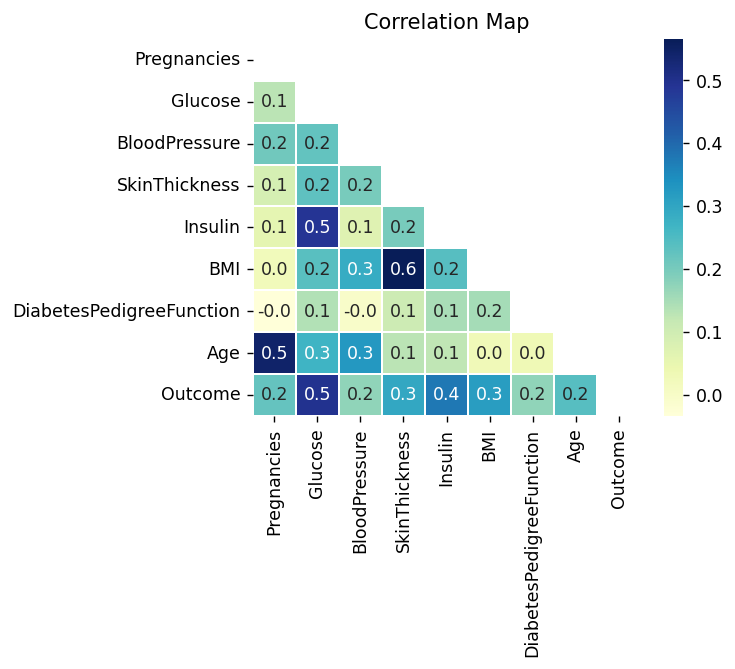

In [18]:
plt.figure(dpi = 125,figsize= (5,4))
mask = np.triu(df.corr())
#np.triu returns lower triangle for our heatmap as we do not need upper map
sns.heatmap(df_nan.corr(),mask = mask, fmt = ".1f",annot=True,lw=0.1,cmap = 'YlGnBu')
plt.title('Correlation Map')
plt.show()
# New Correlation map has higher correlated values